### Importing libraries and packages

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import sklearn
import os, datetime, pickle 

### Data loading

In [55]:
filepath = r'C:\Users\HP\Documents\SHRDC\YPAI07_CPU\Hands On\Assesments\Exercise_3_Ecommerce_Data\ecommerceDataset.csv'
df = pd.read_csv(filepath)

### Data inspection

In [56]:
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [57]:
df.columns = ['category', 'product_description']

In [58]:
df.head()

,category,product_description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


### Data cleaning

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             50424 non-null  object
 1   product_description  50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [60]:
df.isna().sum()

category               0
product_description    1
dtype: int64

In [61]:
df.dropna(inplace=True)

In [62]:
df.isna().sum()

category               0
product_description    0
dtype: int64

In [63]:
#dealing with duplicates
df.duplicated().sum()

22622

In [64]:
df['category'].value_counts()

category
Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64

### Data preprocessing

In [65]:
#split the data into features and labels
labels = df['category'].values
features = df['product_description'].values

In [66]:
#convert the categorical label into integer - label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder() 
labels_encoded = label_encoder.fit_transform(labels)

labels_oh_encoder = OneHotEncoder()
labels_oh_encoded = labels_oh_encoder.fit_transform(labels.reshape(-1, 1)) 

In [67]:
#perform train test split
from sklearn.model_selection import train_test_split 

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, train_size=0.8, random_state=SEED)

In [68]:
#process the input texts
#a. tokenization
vocab_size = 5000
oov_token = '<OOV>'
max_length = 200 
embedding_dim = 64

#b. define the tokenizer object
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size, 
                                               split=" ",
                                               oov_token=oov_token)

tokenizer.fit_on_texts(X_train)

In [69]:
#c. Transform texts into tokens
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [70]:
#d. perform padding  (so that they all have same length)
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_tokens, maxlen=max_length, 
                                           padding="post", truncating="post")
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_tokens, maxlen=max_length, 
                                           padding="post", truncating="post")

In [71]:
word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_tokens(tokens):
    return " ".join([reverse_word_index.get(i, "?") for i in tokens])

print(X_train[2])
print("-------------------------------")
print(decode_tokens(X_train_padded[2]))

Callas Bamboo Bathtub Caddy Tray, Brown Callas bathtub caddy bamboo bath tray with extending sides, reading rack, tablet holder, cellphone tray and wine glass holder. Callas has designed a unique bathtub caddy that will give you an ultimate relaxation. Everything within this caddy has been ergonomically designed for the sleekest, easy-to-use, simplest bath time enhancement.
-------------------------------
<OOV> bamboo bathtub <OOV> tray brown <OOV> bathtub <OOV> bamboo bath tray with <OOV> sides reading rack tablet holder cellphone tray and wine glass holder <OOV> has designed a unique bathtub <OOV> that will give you an ultimate <OOV> everything within this <OOV> has been ergonomically designed for the <OOV> easy to use <OOV> bath time <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

### Model development

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 332,740
Trainable params: 332,740
Non-trainable params: 0
________________________________________________

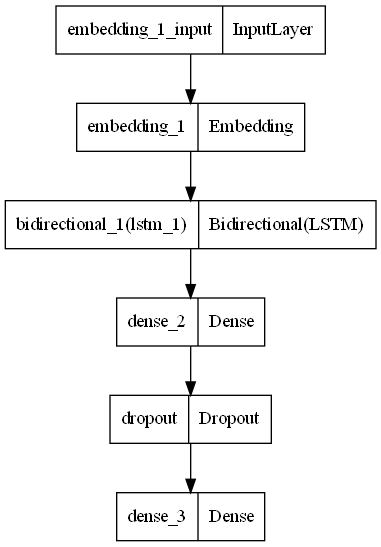

In [72]:
#a. create a sequential model, then start with embedding layer
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))

#b. build RNN model, here we use bidirectional LSTM
model.add(keras.layers.Bidirectional(keras.layers.LSTM(16)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(len(np.unique(labels)), activation='softmax'))

model.summary()
keras.utils.plot_model(model)

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model training

In [74]:
max_epoch = 20
early_stopping = keras.callbacks.EarlyStopping(patience=3)

PATH = os.getcwd()
logpath = os.path.join(PATH, 'Tensorboard_Log', datetime.datetime.now().strftime('%Y%m%d - %H%M%S'))
 
tb = tf.keras.callbacks.TensorBoard(logpath) 

history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test),
                   epochs=max_epoch, callbacks=[early_stopping, tb])

Epoch 1/20


1261/1261 [==============================] - 203s 155ms/step - loss: 0.2583 - accuracy: 0.9186 - val_loss: 0.1343 - val_accuracy: 0.9640
Epoch 2/20
1261/1261 [==============================] - 211s 167ms/step - loss: 0.0940 - accuracy: 0.9761 - val_loss: 0.1223 - val_accuracy: 0.9689
Epoch 3/20
1261/1261 [==============================] - 240s 190ms/step - loss: 0.0622 - accuracy: 0.9839 - val_loss: 0.1167 - val_accuracy: 0.9701
Epoch 4/20
1261/1261 [==============================] - 204s 162ms/step - loss: 0.0443 - accuracy: 0.9886 - val_loss: 0.1206 - val_accuracy: 0.9728
Epoch 5/20
1261/1261 [==============================] - 209s 166ms/step - loss: 0.0329 - accuracy: 0.9912 - val_loss: 0.1232 - val_accuracy: 0.9738
Epoch 6/20
1261/1261 [==============================] - 201s 160ms/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.1272 - val_accuracy: 0.9733


### Results

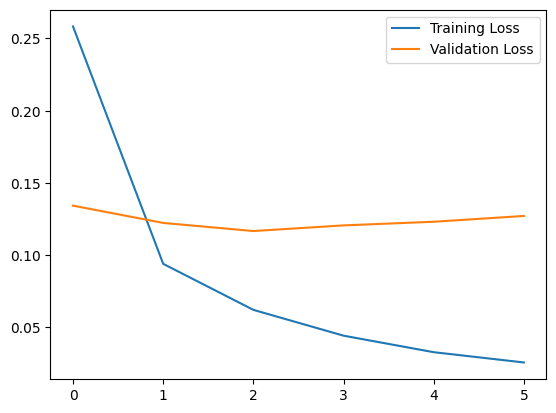

In [83]:
#loss graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

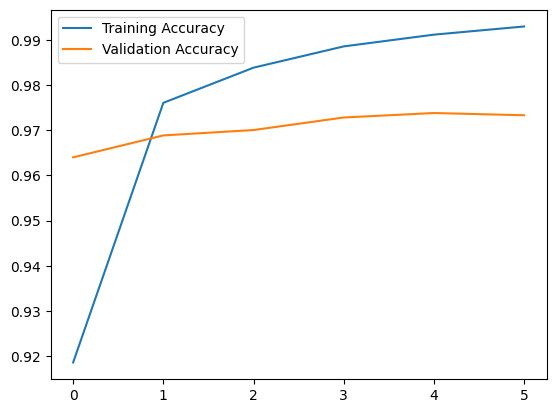

In [84]:
#accuracy graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [89]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_padded)
y_pred_index = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_index)
print(report)

316/316 [==============================] - 16s 35ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2335
           1       0.99      0.98      0.98      1759
           2       0.97      0.96      0.97      2112
           3       0.97      0.98      0.97      3879

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



### Save model

In [90]:
save_dir = 'saved_model'
os.makedirs(save_dir, exist_ok=True)

model.save(os.path.join(save_dir, 'model.h5'))